# **Distance Predictor Part 2**
Author: Declan Costello

Date: 7/29/2023

## **Part 2 Description**

Here I clean the data *WITHOUT* imputation or feature engineering, and start predicting batted balls trajectory distance based on launch angle and launch speed

## **Table of Context**

1. [Installation](#Installation)
2. [Inspecting Data](#Inspecting-Data)
3. [Cleaning Data](#Cleaning-Data)
4. [Train Test Split](#Train-Test-Split)
5. [Linear Regression](#Linear-Regression)
6. [Random Forest Regressor](#Random-Forest-Regressor)
5. [Results](#Results)
6. [Future Analysis](#Future-Analysis)

# **Installation**

The following installs the necessary packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# **Inspecting Data**

In [2]:
data = pd.read_csv('pybaseball_2022.csv')

In [3]:
data = data[data['events'].isin(["field_out", "single", "double",  "triple", "home_run"])]

data = data[['hit_distance_sc','launch_angle','launch_speed']]

In [4]:
print(data.shape)

data.isnull().sum().sort_values(ascending=False)

(119977, 3)


hit_distance_sc    3661
launch_speed       3579
launch_angle       3469
dtype: int64

# **Cleaning Data**

In [5]:
data = data[data['hit_distance_sc'].notna()]
data = data[data['launch_speed'].notna()]
data = data[data['launch_angle'].notna()]

# **Train Test Split**

In [6]:
target_cols = ['hit_distance_sc']
X = data.loc[:, target_cols]

feature_cols = ['launch_angle', 'launch_speed']
y = data.loc[:, feature_cols]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

In [7]:
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

score_dataset(X_train, X_valid, y_train, y_valid)

10.725391247010833

# **Linear Regression**

In [8]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [9]:
ps = model.predict(X_valid)

LinearRegression_mean_squared_error = mean_squared_error(y_valid, ps)
print("LinearRegression mean_absolute_error: " + str(LinearRegression_mean_squared_error))

LinearRegression_mean_absolute_error = mean_absolute_error(y_valid, ps)
print("LinearRegression mean_absolute_error:  " + str(LinearRegression_mean_absolute_error))

LinearRegression_model_score = model.score(X_valid, y_valid)
print("LinearRegression model.score():         " + str(LinearRegression_model_score))

LinearRegression mean_absolute_error: 352.0541385455721
LinearRegression mean_absolute_error:  12.689602580812842
LinearRegression model.score():         0.2591643912259548


# **Random Forest Regressor**

In [10]:
model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
ps = model.predict(X_valid)

RandomForestRegressor_mean_squared_error = mean_squared_error(y_valid, ps)
print("RandomForestRegressor mean_absolute_error: " + str(RandomForestRegressor_mean_squared_error))

RandomForestRegressor_mean_absolute_error = mean_absolute_error(y_valid, ps)
print("RandomForestRegressor mean_absolute_error:  " + str(RandomForestRegressor_mean_absolute_error))
RandomForestRegressor_model_score = model.score(X_valid, y_valid)

print("RandomForestRegressor model.score():         " + str(RandomForestRegressor_model_score))

RandomForestRegressor mean_absolute_error: 221.61047431528604
RandomForestRegressor mean_absolute_error:  10.726565314189894
RandomForestRegressor model.score():         0.46200837466630884


#  **Results**

In [12]:
results_df = pd.DataFrame(columns=['Model','Mean Squared Error','Mean Absolute Error','Model Score'])

results_df.loc[0] = ['Linear Regression',LinearRegression_mean_squared_error,LinearRegression_mean_absolute_error,LinearRegression_model_score]

results_df.loc[1] = ['Random Forest Regressor', RandomForestRegressor_mean_squared_error, RandomForestRegressor_mean_absolute_error, RandomForestRegressor_model_score]  # adding a row

results_df

,Model,Mean Squared Error,Mean Absolute Error,Model Score
0,Linear Regression,352.054139,12.689603,0.259164
1,Random Forest Regressor,221.610474,10.726565,0.462008


<Figure size 3200x500 with 0 Axes>

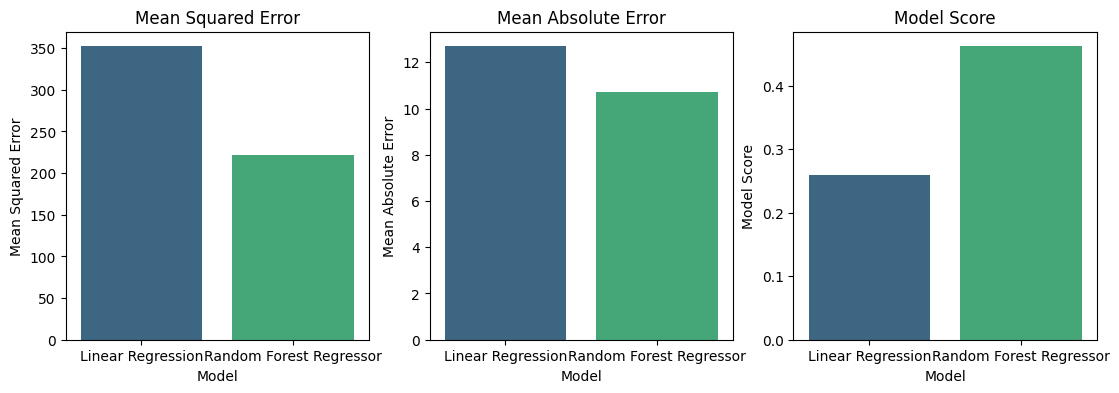

In [13]:
#only turning off for graph
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(32,5))

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

plt.subplot(141)
sns.barplot(data=results_df, x="Model", y="Mean Squared Error", palette='viridis')
plt.title('Mean Squared Error')

plt.subplot(142)
sns.barplot(data=results_df, x="Model", y="Mean Absolute Error", palette='viridis')
plt.title('Mean Absolute Error')

plt.subplot(143)
sns.barplot(data=results_df, x="Model", y="Model Score", palette='viridis')
plt.title('Model Score')

plt.show()

 # **Future Analysis**

In the future, I plan to implement imputation, normalize, feature engineer, and hyperparameter tune